<a href="https://colab.research.google.com/github/hjornskar-ctrl/dim-clem/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 - Sources of Gravitational Radiation

In this notebook we will look at some example of gravitational-wave signals, focusing on Compact Binary Coalescences (CBC), black holes and neutron stars in pairs.

## Imports
We will need some standard imports for this notebook:

In [3]:
from matplotlib import pyplot as plt
import numpy as np

And some that are gravitational-wave specific. Most are fairly easy to install "on-the-fly", with either [pip](https://pip.pypa.io/en/stable/), a convenient python package installer available by default on colab, or [conda](https://docs.conda.io/en/latest/), a more general package and environment manager. That last one is what Anaconda uses for instance.

Let's start with the [pycbc](https://pycbc.org/) package, "a software package used to explore astrophysical sources of gravitational waves". This is a software developed by scientists worldwide, some in the LIGO Virgo Kagar collaboration, some at Cardiff University, and actively used in modern Gravitational-wave analyses. To install it on Google colab, we can simply run:

In [4]:
! pip install -q lalsuite pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

And check that it worked with some version information:

In [5]:
import pycbc
pycbc.__version__

/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


'2.7.2'

## Time domain CBC waveforms

There are many modules in the `pycbc` package. For this notebook we will use the `waveform` module, from which we will import the `get_td_waveform()`. `td` stands for "Time Domain".

In [6]:
from pycbc.waveform import get_td_waveform

There are many ways to (approximately) solve the gravitational-wave equations and compute the gravitational-wave signal. New ways are being develloped constantly, and most are rather complicated (take a look at the equations in section 9.4 of [this paper](https://arxiv.org/pdf/1310.1528.pdf)).
    
Here we are using the `SEOBNRv4` approximant, which describes the inspiral, merger, and ringdown phases of a binary black hole merger using a combination of analytical approximations and fits to numerical relativity simulations.

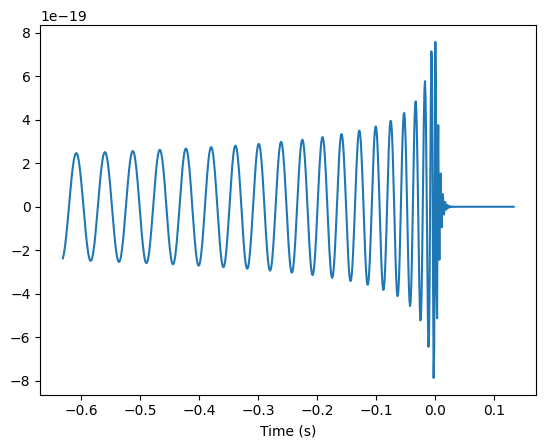

In [7]:
m1 = 38.9 # Solar masses
m2 = 31.6 # Solar masses

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1./1024.,
                         f_lower=20)

plt.plot(hp.sample_times, hp)
plt.xlabel('Time (s)');

Notice that the time axis in seconds is set to be "0" at the peak of the waveform, that's a convention commonly used in gravitational-wave astronomy.

# **Question**
- Zoom in and add some `plt.axvline()` to mark out the _inspiral_ phase, the _merger_ phase and the _ringdown_ phase.

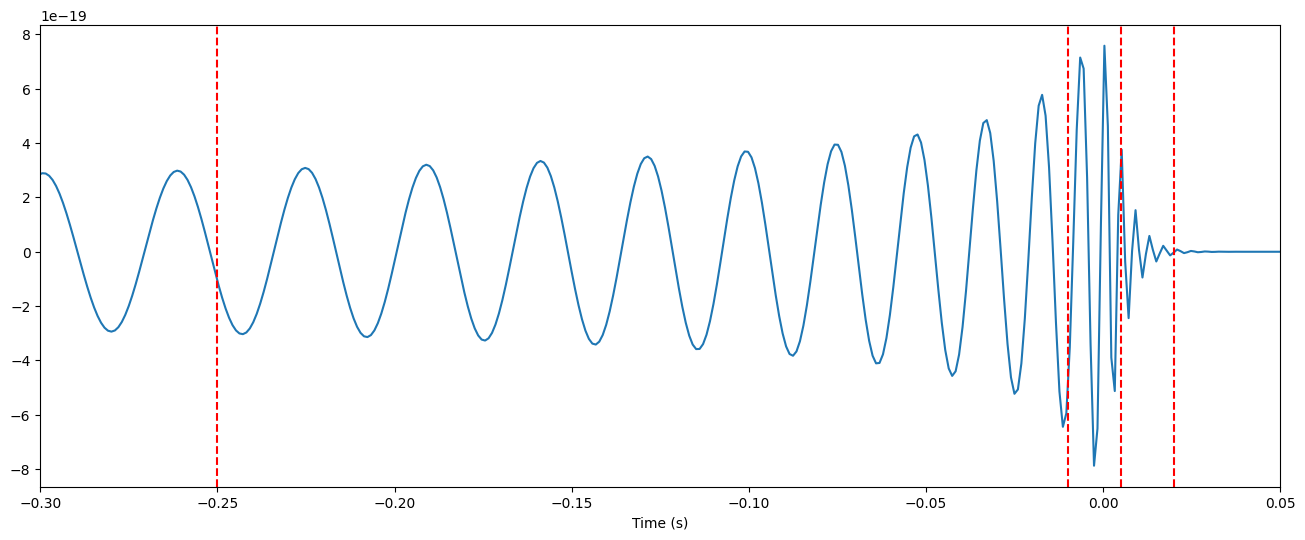

In [8]:
m1 = 38.9 # Solar masses
m2 = 31.6 # Solar masses

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1/1024,
                         f_lower=20)


plt.figure(figsize=(16,6))
plt.plot(hp.sample_times, hp)
plt.axvline(x=-0.25,color='r',linestyle='--')
plt.axvline(x=-0.01,color='r',linestyle='--')
plt.axvline(x=0.005,color='r',linestyle='--')
plt.axvline(x=0.02,color='r',linestyle='--')
plt.xlim(-0.3,0.05)
plt.xlabel('Time (s)');

A note on [object-oriented programming](https://en.wikipedia.org/wiki/Object-oriented_programming). In python, almost everything is an _object_, with _methods_ that the user can call. Here is [a quick example](https://towardsdatascience.com/understand-o-o-p-in-python-with-one-article-bfa76f3ba48c). You have been using object oriented programming already, e.g.:

In [9]:
a=np.array([1,2])
a.mean()

1.5

In [10]:
# Printing some waveform info:
print('The waveform total duration is {}s, while the duration from start to peak is {}s'.format(hp.duration,-hp.start_time))

The waveform total duration is 0.765625s, while the duration from start to peak is 0.631462725s


It's often useful to take a look at the methods of an object and their documentation to see if there are some helping you accomplish what you are trying to do.

Notice that `get_td_waveform()` returns two polarizations of strain.  For now we'll just make use of the plus polarization. Let's generate the same waveform again, but this time change the `f_lower` parameter:

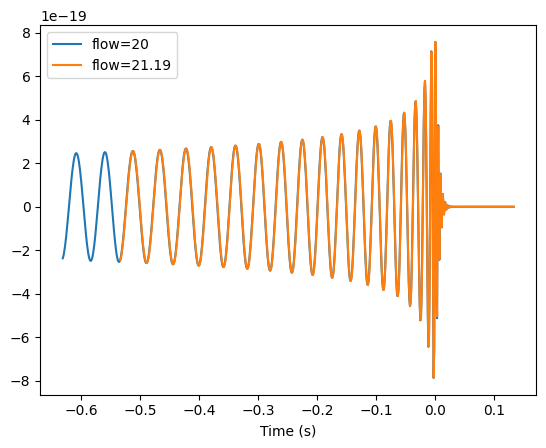

In [11]:
hp2, _ = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1./1024.,
                         f_lower=21.19)

plt.plot(hp.sample_times, hp, label='flow=20')
plt.plot(hp2.sample_times, hp2, label='flow=21.19')
plt.xlabel('Time (s)')
plt.legend();

# **Questions**:
- Zoom towards the merger part of the waveform to see the differences.
- At what frequency does nature's signal start?
- What is `delta_t`, what is its effect, and why did we pick that value here?

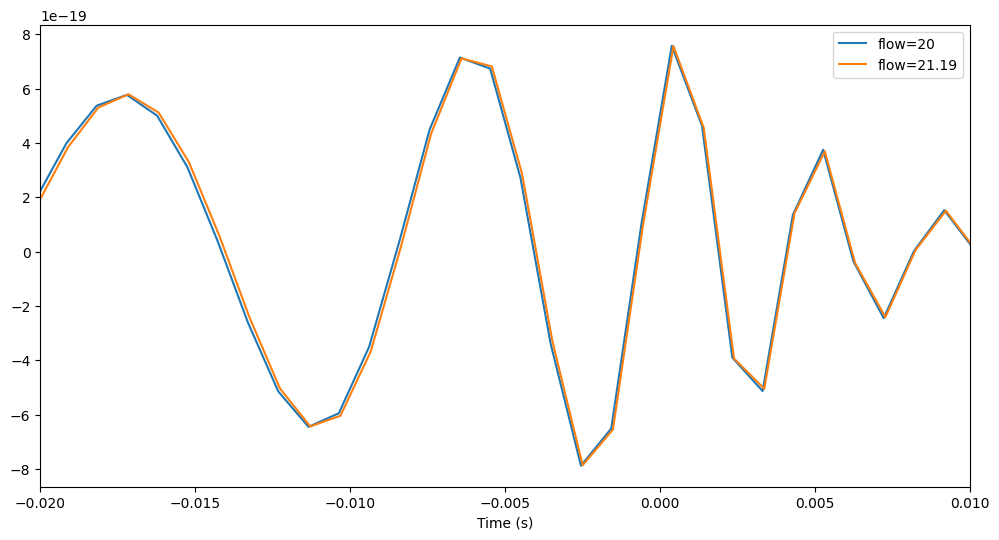

In [12]:
hp2, _ = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1./1024.,
                         f_lower=21.19)


plt.figure(figsize=(12,6))
plt.plot(hp.sample_times, hp, label='flow=20')
plt.plot(hp2.sample_times, hp2, label='flow=21.19')
plt.xlabel('Time (s)')
plt.xlim(-0.02,0.01)
plt.legend();

The frequency begins at f_lower, which is the intial frequency of the waveform. In this case it is 21.19GHz.



delta_t time between each sampled time coordinate of the waveform. The larger this is, the lower the number of time samples.

Related to this last question, how long can those signals get? Let's take an extreme A+ LIGO example of an abnormaly light neutron star (1 solar mass):

Signal length is about 29.6 minutes.
CPU times: user 19.2 s, sys: 1.47 s, total: 20.7 s
Wall time: 20.8 s


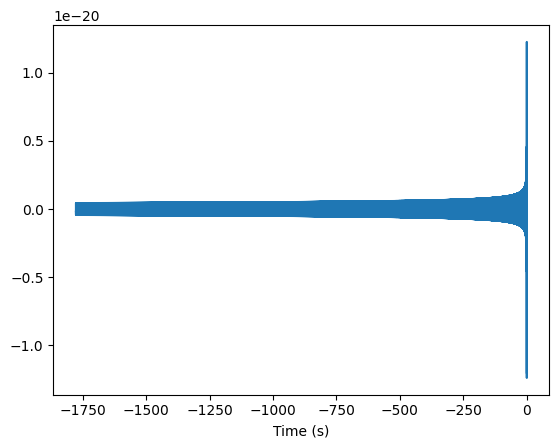

In [13]:
%%time

m1 = 1. # Solar masses
m2 = 1. # Solar masses

hp, hc = get_td_waveform(approximant="TaylorT4",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1./8192.,
                         f_lower=10.)

plt.plot(hp.sample_times, hp)
plt.xlabel('Time (s)');

print("Signal length is about {:.1f} minutes.".format(hp.duration/60))

Note that we had to change the "approximant" for such a low-mass signal. `TaylorT4` is a simpler (and faster) approximant, and yet the signal generation time was much longer.

# **Question:**
- What do you think are the consequences of such a long signal for data analysis?
- Investigate the effects of changing the parameters, two examples are given below.
- Extra challenge: highlight degeneracies as mentioned in the weekly lecture by making plots of waveforms with different parameters being very similar over a range of time.
- This `TaylorT4` approximant only models the _inspiral_ phase of the signal. Use it to compare it agains the first signal you created, and see where the inspiral phase ends...

Varying the total mass:

A consequence of a long signal (as shown in the example above) is delta_t must altered to match a simulated waveform for parameter estimation of the CBC. Further, the long period before the inpiral phase should be removed since it is not relevant to the data analysis task.

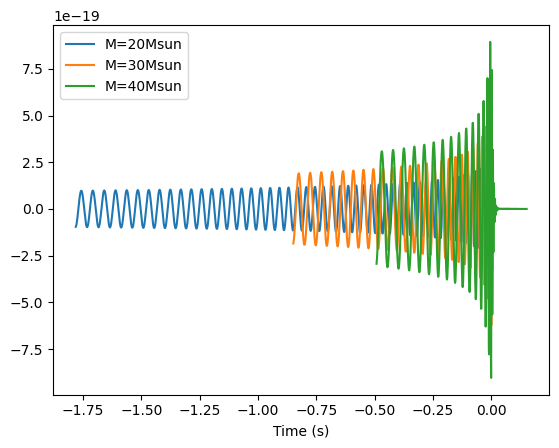

In [14]:
for m in [20,30,40]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=1./1024.,
                     f_lower=20)
    plt.plot(hp.sample_times,hp,label='M='+str(m)+'Msun')

plt.xlabel('Time (s)')
plt.legend();


Varying the mass of the CBC systems alters the strain amplitude and period of oscillation of the GW signal. Generally as the mass is increased, the amplitude and frequency of oscillation increases.

Varying the distance:

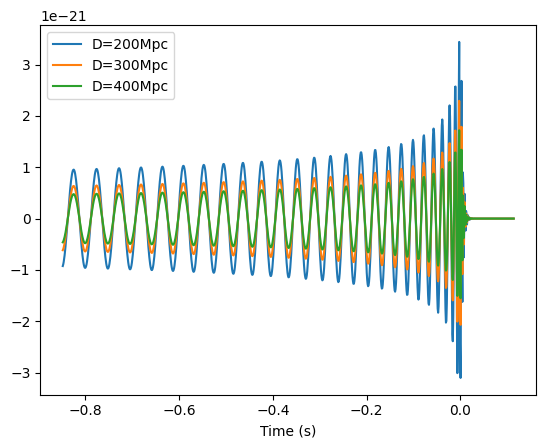

In [15]:
for d in [200,300,400]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                             mass1=30.,
                             mass2=30.,
                             delta_t=1./1024.,
                             distance=d,
                             f_lower=20)
    plt.plot(hp.sample_times,hp,label='D='+str(d)+'Mpc')

plt.xlabel('Time (s)')
plt.legend();


Variying the distance from us to the CBC only alters the amplitude of the wave.

Signal length is about 0.0 minutes.
CPU times: user 2.36 s, sys: 94.2 ms, total: 2.45 s
Wall time: 2.6 s


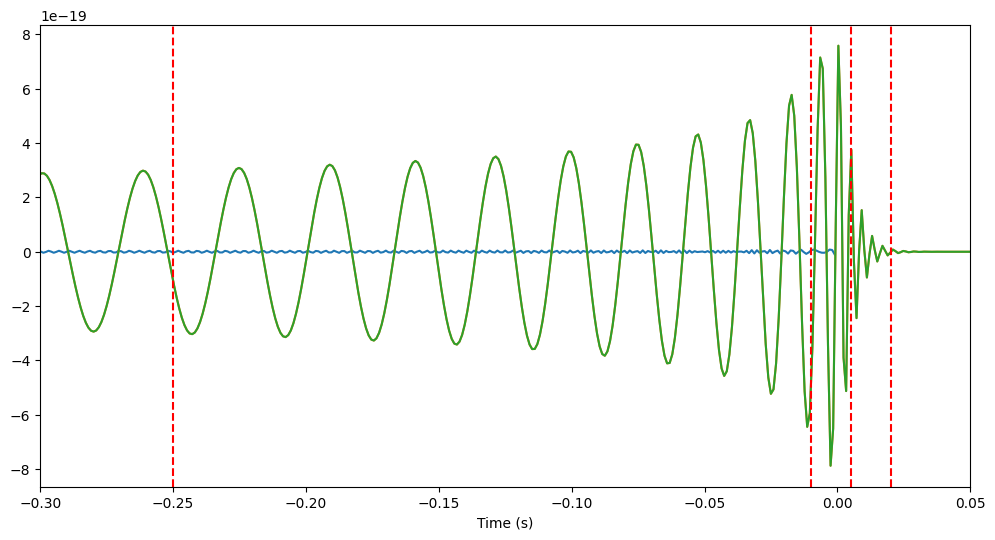

In [24]:
%%time

m1 = 1. # Solar masses
m2 = 1. # Solar masses

hp, hc = get_td_waveform(approximant="TaylorT4",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1./1024.,
                         f_lower=10.)



plt.figure(figsize=(12,6))
plt.plot(hp.sample_times, hp)
plt.xlabel('Time (s)');


m1 = 38.9 # Solar masses
m2 = 31.6 # Solar masses

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1/1024,
                         f_lower=20)


plt.plot(hp.sample_times, hp)
plt.xlabel('Time (s)');


plt.plot(hp.sample_times, hp)
plt.axvline(x=-0.25,color='r',linestyle='--')
plt.axvline(x=-0.01,color='r',linestyle='--')
plt.axvline(x=0.005,color='r',linestyle='--')
plt.axvline(x=0.02,color='r',linestyle='--')
plt.xlim(-0.3,0.05)
plt.xlabel('Time (s)');

print("Signal length is about {:.1f} minutes.".format(hp.duration/60))

## Frequency domain CBC waveforms:

In [17]:
from pycbc.waveform import get_fd_waveform

And `fd` does stand for "Frequency Domain"...

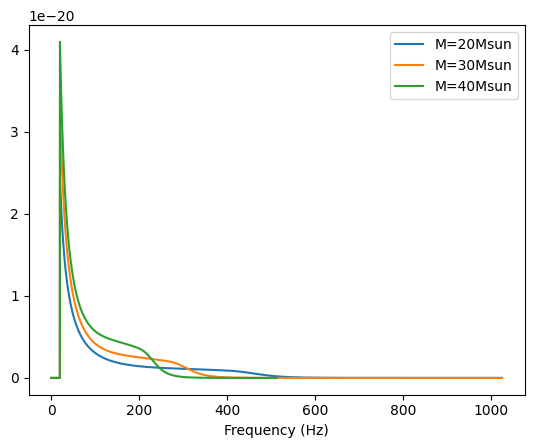

In [18]:
for m in [20,30,40]:
    hp_tilde, hc_tilde = get_fd_waveform(approximant="IMRPhenomPv2",
                                         mass1=m,
                                         mass2=m,
                                         delta_f=1./8.,
                                         f_lower=20)
    plt.plot(hp_tilde.sample_frequencies,np.abs(hp_tilde),label='M='+str(m)+'Msun')

plt.xlabel('Frequency (Hz)')
plt.legend();

`IMRPhenomPv2` is yet another "approximant", which has the particularity to be formulated directly in the time-domain.

# **Question**

- Why do the signals go down in amplitude as a function of frequency given that in the time domain, the amplitude looks larger at higher frequencies?

The signals amplitude deceases as the frequency increases due to the fact that the frequency is correlated with the period of rotation of the CBC system. This means that the system has to merge at a certain frequency, which will mean the amplitude will arrive at zero when this occurs.

## Non-physical models

What if we don't know, or are not willing to assume, what source created a given gravitational-wave signals? How to we ensure we won't miss the Universe's surprises?

We can use models that are wave-like, but are not making assumptions, and instead help us measure significance, strength, frequencies of the signals. One such example is a sine-gaussian:

In [19]:
from scipy.signal import gausspulse

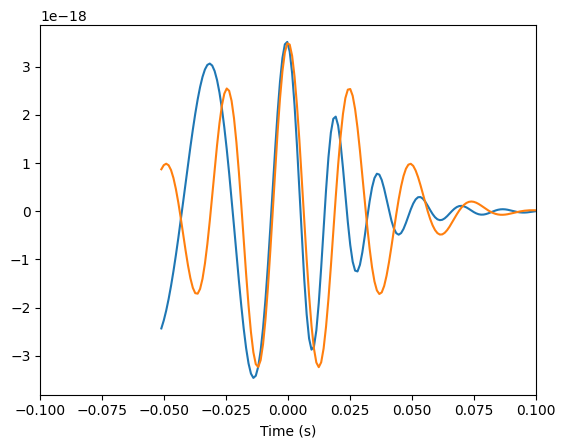

In [25]:
m1 = 150. # Solar masses
m2 = 150. # Solar masses

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1./1024.,
                         f_lower=20)

plt.plot(hp.sample_times, hp)

plt.plot(hp.sample_times, gausspulse(hp.sample_times, fc=40, bw=0.3)*3.5e-18) #bw
plt.xlim(-0.1,0.1)

plt.xlabel('Time (s)');

# **Questions**
- Try to match this very high-mass CBC signal with the sine-guassian agnostic model by changing its parameters.
- Would it be even better to add multiple such models?

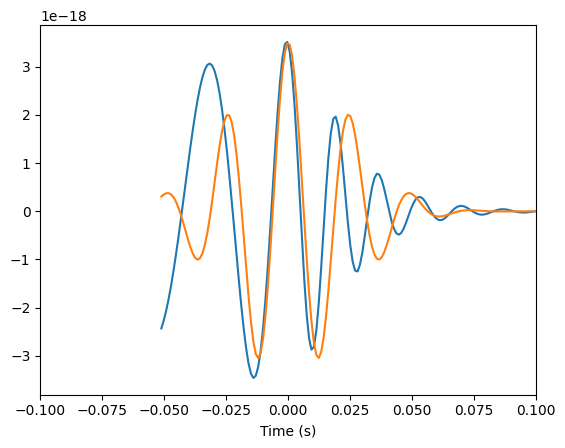

In [57]:
m1 = 150. # Solar masses
m2 = 150. # Solar masses

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1./1024.,
                         f_lower=20)

plt.plot(hp.sample_times, hp)

plt.plot(hp.sample_times, gausspulse(hp.sample_times, fc=40, bw=0.4)*3.5e-18) # bw=Fractional bandwidth in frequency domain of pulse, fc=Center frequency
plt.xlim(-0.1,0.1)

plt.xlabel('Time (s)');

A linear combination of gaussian curves would approximate the CBC signal to a higher degree. To ascertain the correlation between both signals to measure its performance to determine the optimal number of linear combinations, the pearson correlation coeffict